In [3]:
pip install pycaret

     |████████████████████████████████| 256kB 4.2MB/s 
     |████████████████████████████████| 157.5MB 75kB/s 
     |████████████████████████████████| 245kB 40.3MB/s 
     |████████████████████████████████| 276kB 42.6MB/s 
     |████████████████████████████████| 102kB 6.9MB/s 
     |████████████████████████████████| 1.8MB 25.8MB/s 
     |████████████████████████████████| 174kB 24.1MB/s 
     |████████████████████████████████| 1.6MB 39.6MB/s 
     |████████████████████████████████| 65.8MB 55kB/s 
     |████████████████████████████████| 14.2MB 39.7MB/s 
     |████████████████████████████████| 6.8MB 36.0MB/s 
     |████████████████████████████████| 81kB 9.6MB/s 
     |████████████████████████████████| 3.1MB 47.4MB/s 
     |████████████████████████████████| 81kB 7.1MB/s 
     |████████████████████████████████| 604kB 29.5MB/s 
     |████████████████████████████████| 61kB 5.9MB/s 
     |████████████████████████████████| 2.1MB 37.4MB/s 
     |████████████████████████████████| 81kB 8.1MB/s 
  

In [4]:
import pycaret
pycaret.__version__

'2.2.0'

In [5]:
import pandas as pd

data=pd.read_csv('creditcard.csv')
data.drop('Time', axis=1, inplace=True)
from pycaret.classification import *
clf=setup(data=data, target='Class', train_size=0.8, session_id=6)

,Description,Value
0,session_id,6
1,Target,Class
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(284807, 30)"
5,Missing Values,False
6,Numeric Features,29
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [6]:
models(internal=True)[['Name','GPU Enabled']]

,Name,GPU Enabled
ID,,
lr,Logistic Regression,False
knn,K Neighbors Classifier,False
nb,Naive Bayes,False
dt,Decision Tree Classifier,False
svm,SVM - Linear Kernel,False
rbfsvm,SVM - Radial Kernel,False
gpc,Gaussian Process Classifier,False
mlp,MLP Classifier,False
ridge,Ridge Classifier,False


In [7]:
best3models=compare_models(sort='F1', n_select=3, fold=2)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
xgboost,Extreme Gradient Boosting,0.9995,0.9736,0.7843,0.9279,0.8501,0.8498,0.8528,54.900
catboost,CatBoost Classifier,0.9995,0.9743,0.7817,0.9305,0.8496,0.8494,0.8526,58.545
rf,Random Forest Classifier,0.9995,0.9447,0.7665,0.9183,0.8354,0.8351,0.8386,75.830
et,Extra Trees Classifier,0.9995,0.9500,0.7640,0.9154,0.8326,0.8324,0.8359,12.150
lda,Linear Discriminant Analysis,0.9994,0.9009,0.7614,0.8634,0.8083,0.8079,0.8100,1.080
svm,SVM - Linear Kernel,0.9993,0.0000,0.7360,0.8231,0.7770,0.7766,0.7779,0.980
ada,Ada Boost Classifier,0.9992,0.9685,0.6853,0.8165,0.7451,0.7447,0.7476,25.890
lr,Logistic Regression,0.9992,0.9744,0.6421,0.8753,0.7358,0.7354,0.7467,13.215
gbc,Gradient Boosting Classifier,0.9992,0.8221,0.6472,0.8343,0.7255,0.7251,0.7327,132.540
dt,Decision Tree Classifier,0.9990,0.8627,0.7259,0.7073,0.7160,0.7155,0.7158,8.025


In [9]:
lr=create_model('lr', fold=2)
lr

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9993,0.9838,0.7360,0.8580,0.7923,0.7920,0.7944
1,0.9991,0.9649,0.5482,0.8926,0.6792,0.6788,0.6991
Mean,0.9992,0.9744,0.6421,0.8753,0.7358,0.7354,0.7467
SD,0.0001,0.0094,0.0939,0.0173,0.0566,0.0566,0.0476


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=6, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [10]:
lgbm=create_model('lightgbm', fold=2)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9953,0.6736,0.5178,0.1865,0.2742,0.2723,0.3089
1,0.9950,0.7106,0.5635,0.1850,0.2785,0.2767,0.3210
Mean,0.9951,0.6921,0.5406,0.1857,0.2764,0.2745,0.3149
SD,0.0002,0.0185,0.0228,0.0007,0.0022,0.0022,0.0061


In [11]:
tuned_lr=tune_model(lr, fold=2, optimize='F1')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9993,0.9838,0.7360,0.8580,0.7923,0.7920,0.7944
1,0.9991,0.9635,0.5584,0.8943,0.6875,0.6871,0.7063
Mean,0.9992,0.9737,0.6472,0.8761,0.7399,0.7396,0.7503
SD,0.0001,0.0101,0.0888,0.0182,0.0524,0.0525,0.0440


In [12]:
tuned_lr

LogisticRegression(C=1.81, class_weight={}, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='none',
                   random_state=6, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [13]:
tuned_lgbm=tune_model(lgbm, fold=2, optimize='F1')
tuned_lgbm

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9995,0.9786,0.7868,0.9226,0.8493,0.8491,0.8518
1,0.9995,0.9805,0.7411,0.9419,0.8295,0.8293,0.8353
Mean,0.9995,0.9795,0.7640,0.9323,0.8394,0.8392,0.8435
SD,0.0000,0.0009,0.0228,0.0097,0.0099,0.0099,0.0083


LGBMClassifier(bagging_fraction=0.5, bagging_freq=2, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.9,
               importance_type='split', learning_rate=0.234, max_depth=-1,
               min_child_samples=75, min_child_weight=0.001, min_split_gain=0.3,
               n_estimators=100, n_jobs=-1, num_leaves=80, objective=None,
               random_state=6, reg_alpha=0.5, reg_lambda=2, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

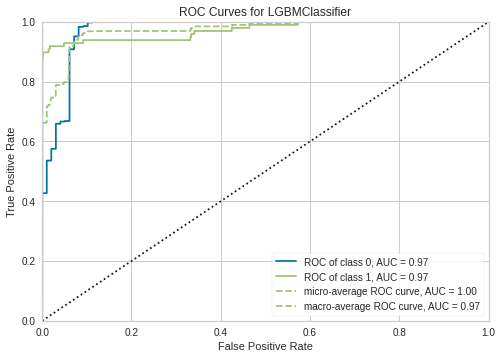

In [14]:
plot_model(tuned_lgbm, 'auc')

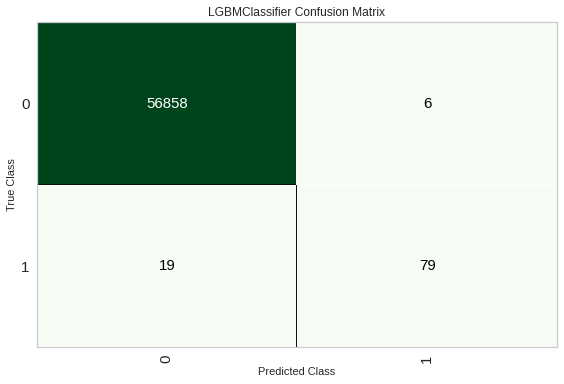

In [15]:
plot_model(tuned_lgbm, 'confusion_matrix')

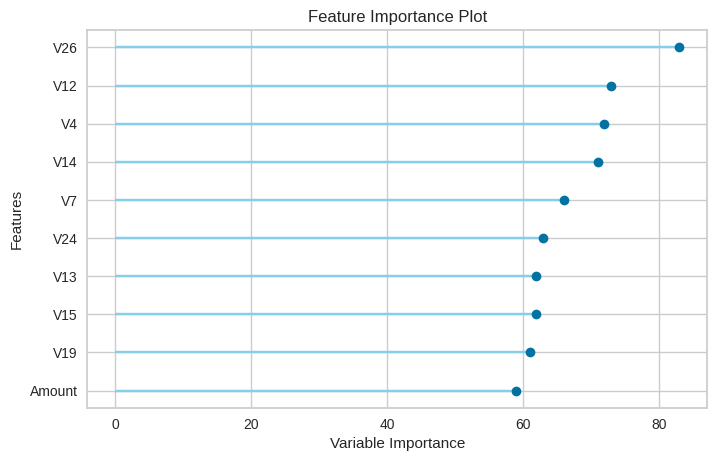

In [19]:
plot_model(tuned_lgbm, 'feature')

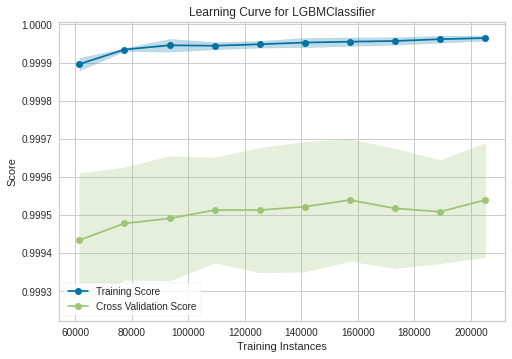

In [26]:
plot_model(tuned_lgbm, 'learning')

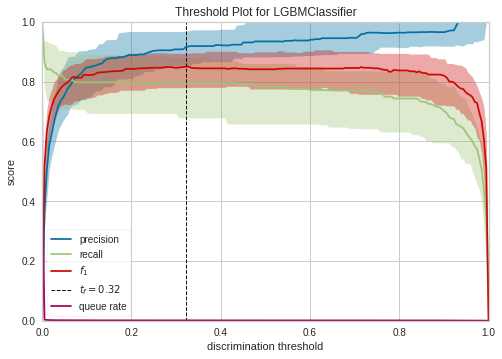

In [27]:
plot_model(tuned_lgbm, 'threshold')

In [29]:
blended=blend_models(estimator_list=best3models, fold=2, method='soft')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9996,0.9824,0.7919,0.9455,0.8619,0.8617,0.8651
1,0.9995,0.9783,0.7665,0.9321,0.8412,0.8410,0.8450
Mean,0.9995,0.9804,0.7792,0.9388,0.8516,0.8513,0.8550
SD,0.0000,0.0021,0.0127,0.0067,0.0103,0.0103,0.0100


In [30]:
pred_holdput=predict_model(blended)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Voting Classifier,0.9996,0.9787,0.8061,0.9634,0.8778,0.8776,0.8811


In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os

warnings.filterwarnings('ignore')

train=pd.read_csv('./train.csv')
test=pd.read_csv('./test.csv')

In [67]:
train.head()

,id,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,0,40,Private,168538,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,0,0,60,United-States,>50K
1,1,17,Private,101626,9th,5,Never-married,Machine-op-inspct,Own-child,White,Male,0,0,20,United-States,<=50K
2,2,18,Private,353358,Some-college,10,Never-married,Other-service,Own-child,White,Male,0,0,16,United-States,<=50K
3,3,21,Private,151158,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,25,United-States,<=50K
4,4,24,Private,122234,Some-college,10,Never-married,Adm-clerical,Not-in-family,Black,Female,0,0,20,?,<=50K


In [68]:
test.head()

,id,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country
0,0,28,Private,67661,Some-college,10,Never-married,Adm-clerical,Other-relative,White,Female,0,0,40,United-States
1,1,40,Self-emp-inc,37869,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,50,United-States
2,2,20,Private,109952,Some-college,10,Never-married,Handlers-cleaners,Own-child,White,Male,0,0,25,United-States
3,3,40,Private,114537,Assoc-voc,11,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,50,United-States
4,4,37,Private,51264,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,99,France


In [69]:
print(train.isnull().sum(),'\n')
print(test.isnull().sum())

id                0
age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64 

id                0
age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
dtype: int64


In [70]:
print(train.info())
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26049 entries, 0 to 26048
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              26049 non-null  int64 
 1   age             26049 non-null  int64 
 2   workclass       26049 non-null  object
 3   fnlwgt          26049 non-null  int64 
 4   education       26049 non-null  object
 5   education_num   26049 non-null  int64 
 6   marital_status  26049 non-null  object
 7   occupation      26049 non-null  object
 8   relationship    26049 non-null  object
 9   race            26049 non-null  object
 10  sex             26049 non-null  object
 11  capital_gain    26049 non-null  int64 
 12  capital_loss    26049 non-null  int64 
 13  hours_per_week  26049 non-null  int64 
 14  native_country  26049 non-null  object
 15  income          26049 non-null  object
dtypes: int64(7), object(9)
memory usage: 3.2+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeI

In [71]:
train['income'].value_counts()

<=50K    19744
>50K      6305
Name: income, dtype: int64

In [72]:
train['income']=train['income'].apply(lambda x: 0 if x=='<=50K' else 1)
train['income'].value_counts()

0    19744
1     6305
Name: income, dtype: int64

In [73]:
all_data=pd.concat([train, test])
all_data.head()

,id,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,0,40,Private,168538,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,0,0,60,United-States,1.0
1,1,17,Private,101626,9th,5,Never-married,Machine-op-inspct,Own-child,White,Male,0,0,20,United-States,0.0
2,2,18,Private,353358,Some-college,10,Never-married,Other-service,Own-child,White,Male,0,0,16,United-States,0.0
3,3,21,Private,151158,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,25,United-States,0.0
4,4,24,Private,122234,Some-college,10,Never-married,Adm-clerical,Not-in-family,Black,Female,0,0,20,?,0.0


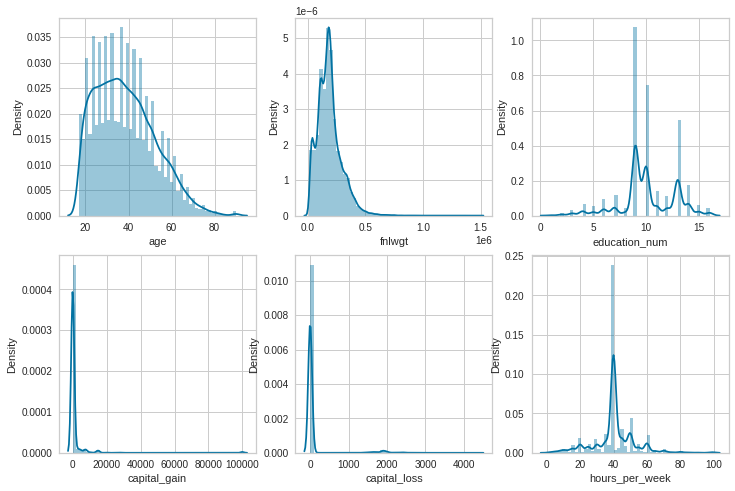

In [74]:
plt.figure(figsize=(12, 8))
plt.subplot(231)
sns.distplot(all_data['age'])
plt.subplot(232)
sns.distplot(all_data['fnlwgt'])
plt.subplot(233)
sns.distplot(all_data['education_num'])
plt.subplot(234)
sns.distplot(all_data['capital_gain'])
plt.subplot(235)
sns.distplot(all_data['capital_loss'])
plt.subplot(236)
sns.distplot(all_data['hours_per_week'])

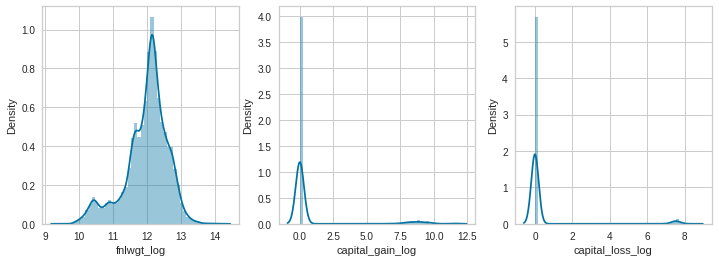

In [75]:
all_data['fnlwgt_log']=np.log1p(all_data['fnlwgt'])
all_data['capital_gain_log']=np.log1p(all_data['capital_gain'])
all_data['capital_loss_log']=np.log1p(all_data['capital_loss'])

plt.figure(figsize=(12, 4))
plt.subplot(131)
sns.distplot(all_data['fnlwgt_log'])
plt.subplot(132)
sns.distplot(all_data['capital_gain_log'])
plt.subplot(133)
sns.distplot(all_data['capital_loss_log'])

In [76]:
print(all_data['education'].value_counts(),'\n')
print(all_data['education_num'].value_counts())

HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education, dtype: int64 

9     10501
10     7291
13     5355
14     1723
11     1382
7      1175
12     1067
6       933
4       646
15      576
5       514
8       433
16      413
3       333
2       168
1        51
Name: education_num, dtype: int64


In [77]:
all_data=all_data.drop('education_num', axis=1)

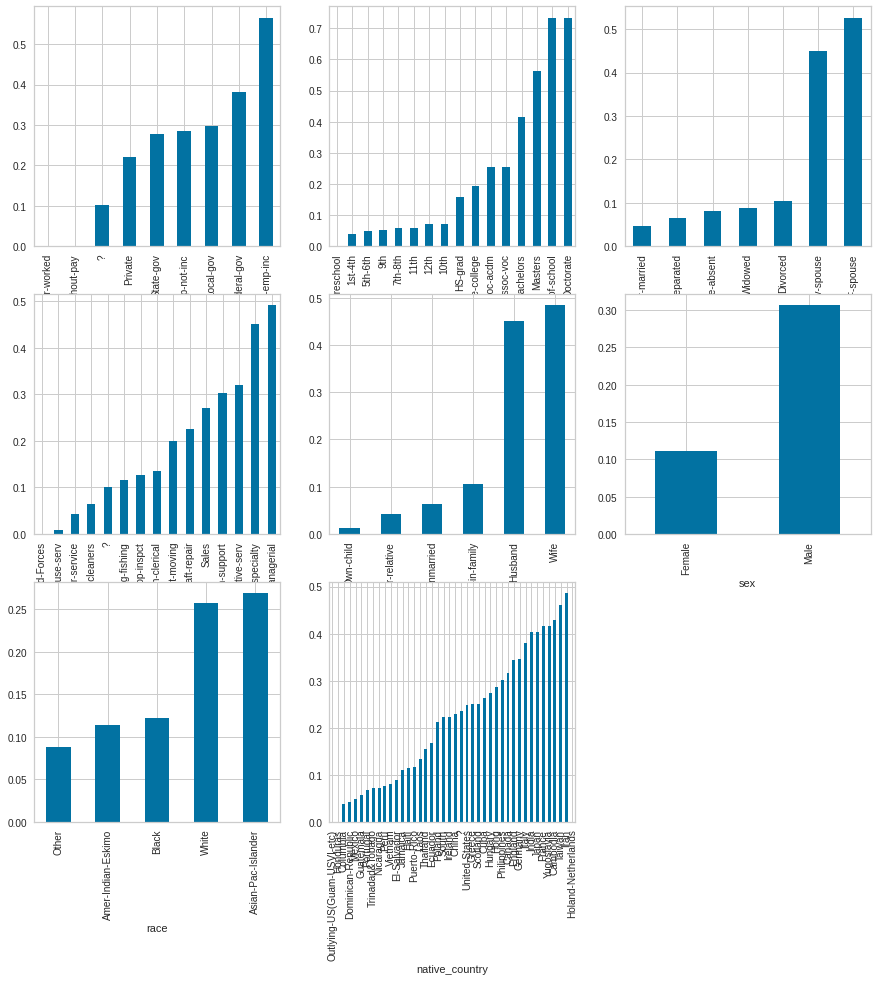

In [78]:
plt.figure(figsize=(15, 15))
plt.subplot(331)
all_data.groupby('workclass')['income'].mean().sort_values().plot(kind='bar')
plt.subplot(332)
all_data.groupby('education')['income'].mean().sort_values().plot(kind='bar')
plt.subplot(333)
all_data.groupby('marital_status')['income'].mean().sort_values().plot(kind='bar')
plt.subplot(334)
all_data.groupby('occupation')['income'].mean().sort_values().plot(kind='bar')
plt.subplot(335)
all_data.groupby('relationship')['income'].mean().sort_values().plot(kind='bar')
plt.subplot(336)
all_data.groupby('sex')['income'].mean().sort_values().plot(kind='bar')
plt.subplot(337)
all_data.groupby('race')['income'].mean().sort_values().plot(kind='bar')
plt.subplot(338)
all_data.groupby('native_country')['income'].mean().sort_values().plot(kind='bar')

In [79]:
all_data['workclass'].value_counts()

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

In [80]:
all_data.groupby('workclass')['income'].sum()

workclass
?                    153.0
Federal-gov          292.0
Local-gov            505.0
Never-worked           0.0
Private             3993.0
Self-emp-inc         496.0
Self-emp-not-inc     577.0
State-gov            289.0
Without-pay            0.0
Name: income, dtype: float64

In [81]:
workclass_other=['Without-pay', 'Never-Worked']
all_data['worklcass']=all_data['workclass'].apply(lambda x:'Other' if x in workclass_other else x)

In [82]:
all_data['workclass'].value_counts()

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

In [83]:
all_data.groupby(['education'])['income'].agg(['mean','count']).sort_values('mean')

,mean,count
education,,
Preschool,0.000000,40
1st-4th,0.037313,134
5th-6th,0.049057,265
9th,0.052632,418
7th-8th,0.057426,505
11th,0.059653,922
12th,0.072423,359
10th,0.072503,731
HS-grad,0.158544,8433


In [84]:
education_map = {
'Preschool': 'level_0',
'1st-4th': 'level_1',
'5th-6th': 'level_1',
'7th-8th': 'level_1',
'9th': 'level_2',
'10th': 'level_2',
'11th': 'level_2',
'12th': 'level_2',
'HS-grad': 'level_3',
'Some-college': 'level_3',
'Assoc-acdm': 'level_4',
'Assoc-voc': 'level_4',
'Bachelors': 'level_5',
'Masters': 'level_6',
'Prof-school': 'level_7',
'Doctorate': 'level_7',
}


In [85]:
all_data['education']=all_data['education'].map(education_map)

In [86]:
all_data['education'].value_counts()

level_3    17792
level_5     5355
level_2     3055
level_4     2449
level_6     1723
level_1     1147
level_7      989
level_0       51
Name: education, dtype: int64

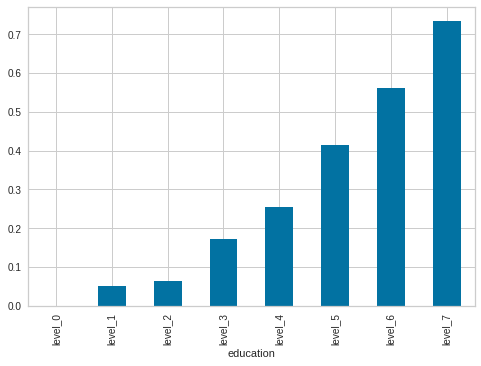

In [87]:
all_data.groupby('education')['income'].mean().sort_values().plot(kind='bar')

In [88]:
all_data['occupation'].value_counts()

Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
?                    1843
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: occupation, dtype: int64

In [89]:
all_data.groupby('occupation')['income'].sum()

occupation
?                     153.0
Adm-clerical          402.0
Armed-Forces            0.0
Craft-repair          738.0
Exec-managerial      1593.0
Farming-fishing        91.0
Handlers-cleaners      71.0
Machine-op-inspct     200.0
Other-service         110.0
Priv-house-serv         1.0
Prof-specialty       1491.0
Protective-serv       167.0
Sales                 811.0
Tech-support          224.0
Transport-moving      253.0
Name: income, dtype: float64

In [90]:
all_data.loc[all_data['occupation'].isin(['Armed-Forces','Priv-house-serv']), 'occupation']='Priv-house-serv'

In [91]:
all_data['occupation'].value_counts()

Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
?                    1843
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       158
Name: occupation, dtype: int64

In [93]:
all_data['native_country'].value_counts()

United-States                 29170
Mexico                          643
?                               583
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
Greece                      

In [94]:
income_01 = ['Jamaica',
'Haiti',
'Puerto-Rico',
'Laos',
'Thailand',
'Ecuador',]
income_02 = ['Outlying-US(Guam-USVI-etc)',
'Honduras',
'Columbia',
'Dominican-Republic',
'Mexico',
'Guatemala',
'Portugal',
'Trinadad&Tobago',
'Nicaragua',
'Peru',
'Vietnam',
'El-Salvador',]
income_03 = ['Poland',
'Ireland',
'South',
'China',]
income_04 = [
'United-States',
]
income_05 = [
'Greece',
'Scotland',
'Cuba',
'Hungary',
'Hong',
'Holand-Netherlands',
]
income_06 = [
'Philippines',
'Canada',
]
income_07 = [
'England',
'Germany',
]
income_08 = [
'Italy',
'India',
'Japan',
'France',
'Yugoslavia',
'Cambodia',
]
income_09 = [
'Taiwan',
'Iran',
]
income_other=['?', ]

In [99]:
def convert_country(x):
  if x in income_01:
    return 'income_01'
  elif x in income_02:
    return 'income_02'
  elif x in income_03:
    return 'income_03'
  elif x in income_04:
    return 'income_04'
  elif x in income_05:
    return 'income_05'
  elif x in income_06:
    return 'income_06'
  elif x in income_07:
    return 'income_07'
  elif x in income_08:
    return 'income_08'
  elif x in income_09:
    return 'income_09'
  else:
    return 'income_other'                                

In [100]:
all_data['country_bin']=all_data['native_country'].apply(convert_country)
all_data['country_bin'].value_counts()

income_04       29170
income_02        1157
income_other      583
income_06         319
income_01         303
income_08         299
income_03         239
income_07         227
income_05         170
income_09          94
Name: country_bin, dtype: int64

In [104]:
features=['age','workclass','fnlwgt_log','education','marital_status','occupation','relationship','race','sex','capital_gain_log', 'capital_loss_log','hours_per_week','country_bin']
label=['income']

In [105]:
all_data_dummies=pd.get_dummies(all_data[features+label])

In [106]:
train_features=all_data_dummies.drop('income', axis=1).iloc[:len(train)]
test_features=all_data_dummies.drop('income',axis=1).iloc[len(train):]

In [107]:
train_features.shape, train_features.shape

((26049, 66), (26049, 66))

In [108]:
train_label=train[label]

In [109]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, f1_score, confusion_matrix

X_train, X_test, y_train, y_test=train_test_split(train_features, train_label, stratify=train_label, test_size=0.2, random_state=6)

In [110]:
from sklearn.ensemble import RandomForestClassifier

rf_clf=RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)
print('Test Accuracy : {0:.4f}'.format(round(rf_clf.score(X_test, y_test)*100, 2)))

Test Accuracy : 85.2600


In [111]:
rf_clf_pred=rf_clf.predict(X_test)
print('RandomForestClassifier report : \n\n', classification_report(y_test, rf_clf_pred))

RandomForestClassifier report : 

               precision    recall  f1-score   support

           0       0.88      0.93      0.91      3949
           1       0.74      0.61      0.67      1261

    accuracy                           0.85      5210
   macro avg       0.81      0.77      0.79      5210
weighted avg       0.85      0.85      0.85      5210



In [112]:
from xgboost import XGBClassifier

xgb_wrapper=XGBClassifier(random_state=42)
evals=[(X_test, y_test)]

xgb_wrapper.fit(X_train, y_train, early_stopping_rounds=100, eval_set=evals, verbose=True)

print("Test Accuracy : {0:.4f}%".format(round(xgb_wrapper.score(X_test, y_test)*100, 2)))

[0]	validation_0-logloss:0.54529
[1]	validation_0-logloss:0.46539
[2]	validation_0-logloss:0.41560
[3]	validation_0-logloss:0.37944
[4]	validation_0-logloss:0.35726
[5]	validation_0-logloss:0.34107
[6]	validation_0-logloss:0.33046
[7]	validation_0-logloss:0.32191
[8]	validation_0-logloss:0.31618
[9]	validation_0-logloss:0.31242
[10]	validation_0-logloss:0.30907
[11]	validation_0-logloss:0.30684
[12]	validation_0-logloss:0.30534
[13]	validation_0-logloss:0.30403
[14]	validation_0-logloss:0.30236
[15]	validation_0-logloss:0.30015
[16]	validation_0-logloss:0.29927
[17]	validation_0-logloss:0.29820
[18]	validation_0-logloss:0.29713
[19]	validation_0-logloss:0.29666
[20]	validation_0-logloss:0.29579
[21]	validation_0-logloss:0.29412
[22]	validation_0-logloss:0.29290
[23]	validation_0-logloss:0.29278
[24]	validation_0-logloss:0.29235
[25]	validation_0-logloss:0.29152
[26]	validation_0-logloss:0.29072
[27]	validation_0-logloss:0.29007
[28]	validation_0-logloss:0.28970
[29]	validation_0-loglos

In [114]:
pred_xgb=xgb_wrapper.predict(X_test)
print('XGBClassifier report : \n\n', classification_report(y_test, pred_xgb))

XGBClassifier report : 

               precision    recall  f1-score   support

           0       0.89      0.94      0.91      3949
           1       0.78      0.63      0.69      1261

    accuracy                           0.87      5210
   macro avg       0.83      0.78      0.80      5210
weighted avg       0.86      0.87      0.86      5210



In [115]:
from lightgbm import LGBMClassifier

lgbm_wrapper=LGBMClassifier(random_state=42)

evals=[(X_test, y_test)]

lgbm_wrapper.fit(X_train, y_train, early_stopping_rounds=100, eval_set=evals, verbose=True)
print("Test Accuracy : {0:.4f}%".format(round(lgbm_wrapper.score(X_test, y_test)*100, 2)))

[1]	valid_0's binary_logloss: 0.51121
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.479711
[3]	valid_0's binary_logloss: 0.45501
[4]	valid_0's binary_logloss: 0.434664
[5]	valid_0's binary_logloss: 0.417514
[6]	valid_0's binary_logloss: 0.403037
[7]	valid_0's binary_logloss: 0.390581
[8]	valid_0's binary_logloss: 0.379714
[9]	valid_0's binary_logloss: 0.369946
[10]	valid_0's binary_logloss: 0.36195
[11]	valid_0's binary_logloss: 0.354916
[12]	valid_0's binary_logloss: 0.34849
[13]	valid_0's binary_logloss: 0.343188
[14]	valid_0's binary_logloss: 0.337497
[15]	valid_0's binary_logloss: 0.332999
[16]	valid_0's binary_logloss: 0.329298
[17]	valid_0's binary_logloss: 0.325438
[18]	valid_0's binary_logloss: 0.322051
[19]	valid_0's binary_logloss: 0.319114
[20]	valid_0's binary_logloss: 0.316654
[21]	valid_0's binary_logloss: 0.314419
[22]	valid_0's binary_logloss: 0.312384
[23]	valid_0's binary_logloss: 0.310718
[24]	valid_0's binary_logloss: 

In [116]:
preds=lgbm_wrapper.predict(X_test)
print('LGBM Report : \n\n', classification_report(y_test, preds))

LGBM Report : 

               precision    recall  f1-score   support

           0       0.89      0.94      0.92      3949
           1       0.78      0.64      0.70      1261

    accuracy                           0.87      5210
   macro avg       0.83      0.79      0.81      5210
weighted avg       0.86      0.87      0.86      5210



In [117]:
from pycaret.classification import *

In [118]:
all_data_caret=all_data[features+label]
all_data_caret.head()

,age,workclass,fnlwgt_log,education,marital_status,occupation,relationship,race,sex,capital_gain_log,capital_loss_log,hours_per_week,country_bin,income
0,40,Private,12.034922,level_3,Married-civ-spouse,Sales,Husband,White,Male,0.0,0.0,60,income_04,1.0
1,17,Private,11.529065,level_2,Never-married,Machine-op-inspct,Own-child,White,Male,0.0,0.0,20,income_04,0.0
2,18,Private,12.775240,level_3,Never-married,Other-service,Own-child,White,Male,0.0,0.0,16,income_04,0.0
3,21,Private,11.926088,level_3,Never-married,Prof-specialty,Own-child,White,Female,0.0,0.0,25,income_04,0.0
4,24,Private,11.713701,level_3,Never-married,Adm-clerical,Not-in-family,Black,Female,0.0,0.0,20,income_other,0.0


In [121]:
train_clean=all_data_caret[:len(train)]
test_clean=all_data_caret[len(train):]

setup(data=train_clean, target='income', session_id=42)

,Description,Value
0,session_id,42
1,Target,income
2,Target Type,Binary
3,Label Encoded,"0.0: 0, 1.0: 1"
4,Original Data,"(26049, 14)"
5,Missing Values,False
6,Numeric Features,5
7,Categorical Features,8
8,Ordinal Features,False
9,High Cardinality Features,False


(False, None, [], Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='income',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strat...
                 ('scaling', 'passthrough'), ('P_transform', 'passthrough'),
                 ('binn', 'passthrough'), ('rem_outliers', 'passthrough'),
                 ('cluster_all', 'passthrough'),
                 ('dummy', Dummify(target='income')),
  

In [123]:
rf_automl=create_model('rf', fold=5)
tuned_rf_automl=tune_model(rf_automl, optimize='F1', fold=5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8536,0.9112,0.5260,0.8034,0.6357,0.5491,0.5684
1,0.8555,0.9099,0.5260,0.8133,0.6388,0.5536,0.5742
2,0.8571,0.9102,0.5214,0.8265,0.6394,0.5560,0.5789
3,0.8654,0.9164,0.5603,0.8311,0.6694,0.5888,0.6069
4,0.8560,0.9118,0.5169,0.8252,0.6357,0.5518,0.5752
Mean,0.8575,0.9119,0.5301,0.8199,0.6438,0.5598,0.5807
SD,0.0041,0.0023,0.0155,0.0101,0.0129,0.0147,0.0135


In [125]:
rf_scores=cross_val_score(rf_clf, train_features, train_label, scoring='f1',cv=5)
print('평균 검증 f1 score : ', np.round(np.mean(rf_scores), 4))

평균 검증 f1 score :  0.6792


In [127]:
xgboost_automl=create_model('xgboost',fold=5)
tuned_xgboost_automl=tune_model(xgboost_automl, optimize='F1', fold=5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7719,0.9187,0.9120,0.5173,0.6601,0.5074,0.5537
1,0.7661,0.9184,0.9334,0.5102,0.6598,0.5039,0.5574
2,0.7732,0.9205,0.9233,0.5187,0.6642,0.5126,0.5613
3,0.7686,0.9257,0.9369,0.5133,0.6632,0.5089,0.5624
4,0.7836,0.9253,0.9379,0.5310,0.6781,0.5332,0.5823
Mean,0.7727,0.9217,0.9287,0.5181,0.6651,0.5132,0.5634
SD,0.0060,0.0032,0.0098,0.0071,0.0067,0.0104,0.0099


In [126]:
xgb_wrapper_scores=cross_val_score(xgb_wrapper, train_features, train_label,scoring='f1', cv=5)
print('평균 검증 f1 score : ', np.round(np.mean(xgb_wrapper_scores), 4))

평균 검증 f1 score :  0.7093


In [128]:
lgbm_automl=create_model('lightgbm', fold=5)
tuned_lgbm_automl=tune_model(lgbm_automl, optimize='F1', fold=5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8656,0.9229,0.6354,0.7712,0.6968,0.6115,0.6162
1,0.8706,0.9243,0.6546,0.7775,0.7108,0.6282,0.6321
2,0.8706,0.9259,0.6354,0.7907,0.7046,0.6230,0.6291
3,0.8714,0.9288,0.6584,0.7787,0.7135,0.6313,0.6350
4,0.8714,0.9274,0.6467,0.7860,0.7096,0.6280,0.6329
Mean,0.8699,0.9259,0.6461,0.7808,0.7071,0.6244,0.6291
SD,0.0022,0.0021,0.0095,0.0068,0.0059,0.0070,0.0067


In [131]:
lgbm_wrapper_scores=cross_val_score(lgbm_wrapper, train_features, train_label, scoring='f1', cv=5)
print('평균 검증 f1 score : ', np.round(np.mean(lgbm_wrapper_scores), 4))

평균 검증 f1 score :  0.7119


In [132]:
best4models=compare_models(sort='F1', n_select=4, fold=3)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.8683,0.9264,0.6430,0.7767,0.7035,0.6198,0.6244,9.2800
lightgbm,Light Gradient Boosting Machine,0.8677,0.9241,0.6421,0.7748,0.7022,0.6181,0.6226,0.3500
xgboost,Extreme Gradient Boosting,0.8650,0.9207,0.6423,0.7646,0.6981,0.6121,0.6159,3.9067
ada,Ada Boost Classifier,0.8600,0.9173,0.6247,0.7569,0.6844,0.5956,0.6001,0.7867
gbc,Gradient Boosting Classifier,0.8649,0.9214,0.5969,0.7960,0.6822,0.5986,0.6087,2.1067
rf,Random Forest Classifier,0.8538,0.9036,0.6195,0.7370,0.6731,0.5798,0.5835,1.9500
lr,Logistic Regression,0.8442,0.9010,0.5922,0.7173,0.6487,0.5498,0.5540,2.6267
lda,Linear Discriminant Analysis,0.8424,0.8959,0.5861,0.7141,0.6437,0.5438,0.5482,0.2300
et,Extra Trees Classifier,0.8325,0.8776,0.6073,0.6717,0.6379,0.5292,0.5304,2.0933
svm,SVM - Linear Kernel,0.7465,0.0000,0.8510,0.5175,0.6314,0.4665,0.5098,0.5467


In [133]:
stacker=stack_models(estimator_list=best4models[1:], meta_model=best4models[0],fold=3)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8656,0.9225,0.6276,0.7764,0.6941,0.6092,0.6149
1,0.8695,0.9266,0.6479,0.7780,0.7071,0.6240,0.6284
2,0.8674,0.9245,0.6574,0.7640,0.7067,0.6216,0.6246
Mean,0.8675,0.9245,0.6443,0.7728,0.7026,0.6183,0.6226
SD,0.0016,0.0017,0.0124,0.0063,0.0060,0.0065,0.0057
